In [ ]:
 # K-means clustering algorithm.
    
 An important concept used in the K-means algorithm is the definition of the centroid. 
 Given a set of points, a cluster, the centroid is the arithmetic mean of all points in the cluster. The main input to the K-means algorithm is, in addition to the datapoints, the number of clusters the dataset is to be classified into and the centroid for these clusters. 
 
 The algorithm itself involves conceptually six steps:
    1. Select the number of clusters.
    2. Select the corresponding centroids
    3. Assign each point to the nearest centroid
    4. Make new centroids for each cluster by computing the avaerage position within each cluster.
    5. Reassign each point to the nearest new cluster.
    6. Repeat 1-5 until the centroids does not change from one iteration to the next.
  
 A simple python example of a possible naive implementation of the algorithm is given below.
 In the section below a simple phyton code for the algorithm is shown.

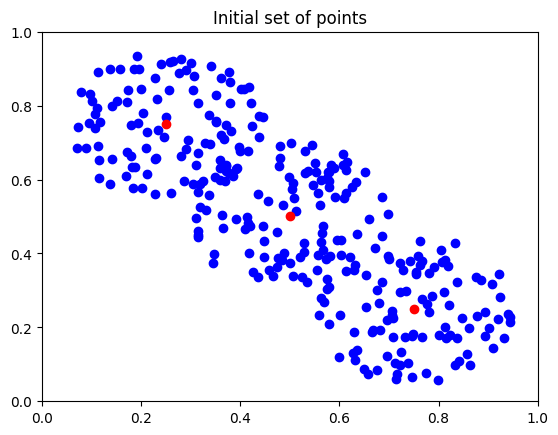

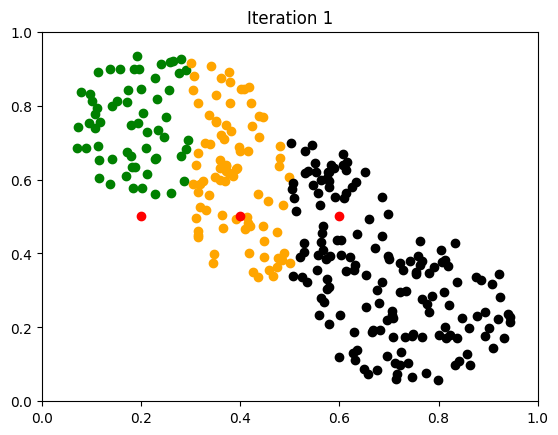

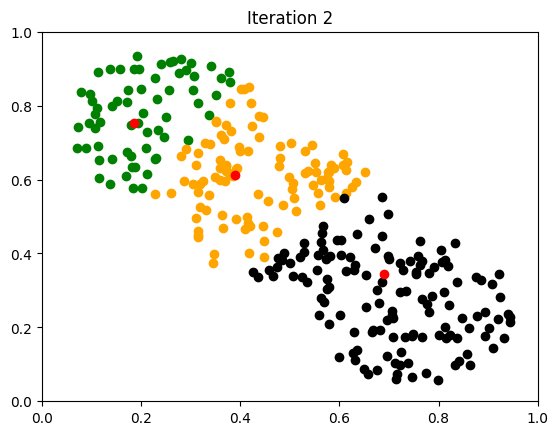

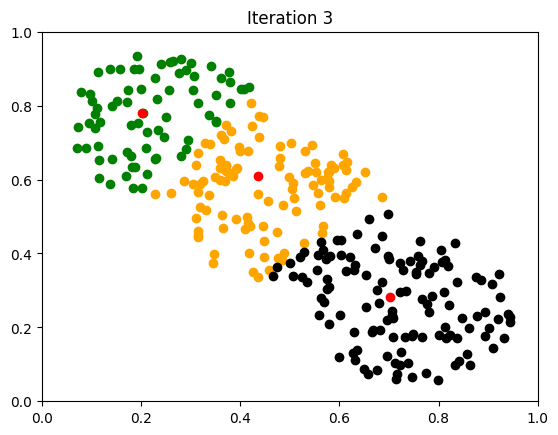

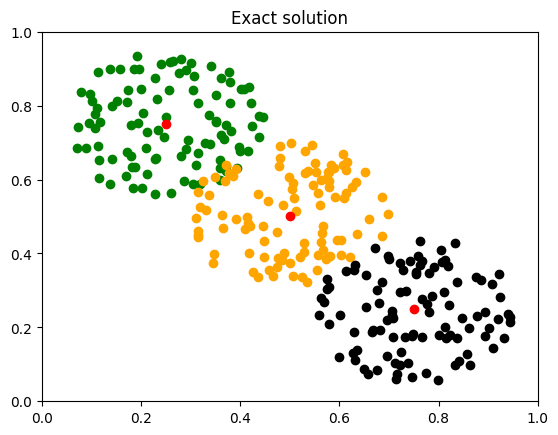

In [3]:
''' K-means basic algorithm
'''
from math import *
import matplotlib.pyplot as pl
from random import random

class point :
    '''This is a small class to hold the coordinates of a point 

   Attributes:
       x: X-coordinate
       y: Y-coordinate
'''
    x=0
    y=0

def cdist(p,c):
    ''' cdist computes the distance between two points
    
    Parameters:
        p: Point defined by the point class
        c: Point defined by the point class
        
    Returns: distance between c and p.
    
    The distance d between two points (x_0,y_0) and (x,y) is
    defined by their eukledian distance d = sqrt((x-x0)**2 + (y-y0)**2)
    
    '''
    
    d = sqrt((p.x-c.x)**2 + (p.y-c.y)**2)
    return (d)

def makecluster(center,r,npoints) :
    ''' Makecluster creates a new cluster with random points 
    
        Parameters:
            center  : The centroid point defined by the point class
            r       : Maximum distance between centroid and points in the cluster
            npoints : The number of points in the cluster
            
        Returns:
            a list containing npoint cluster points defined by the point class
            
    '''
    cluster=[]
    n=0
    while (n < npoints):
        
        #Make a new (empty point)
        p=point()
        
        #Set x and y of the point
        p.x = random()
        p.y = random()
        
        #Accept the point if it is closer than r
        if(cdist(p,center) < r):
            cluster.append(p)
            n=n+1
            
    return(cluster)

def classify(centroids,cluster):
    ''' Classify will group the points aof a cluster into three new clusters
    
        Parameters: 
            centroids : a list of three points defined by the point class
            cluster   : a list of points defined by the point class
                
        Returns:
            A list of three clusters where a point is grouped into the cluster
            with the shortest distance to the centroid.
            
    '''
                           
    new1=[]
    new2=[]
    new3=[]
    for p in cluster:
        
        c=centroids[0]
        d1=cdist(p,c)
        c=centroids[1]
        d2=cdist(p,c)
        c=centroids[2]
        d3=cdist(p,c)
        
        select = min(d1,d2,d3)
        if(d1 == select): 
            new1.append(p)
        elif(d2 == select):
            new2.append(p)
        elif( d3 == select):
            new3.append(p)
        else:
            print("This should not happen!")
            
    new=[new1,new2,new3]
    return(new)
         
def newcentroid(cluster) :
    ''' Create a centroid for a cluster
    
        Parameters: 
            cluster : List of points defined by the point class
        
        Return:
            A point defined by the point class containg the avearage
            position of all points in the cluster
    
    '''
    
    p0=point()
    p0.x=0
    p0.y=0
    for p in cluster:
        p0.x=p0.x+p.x
        p0.y=p0.y+p.y
        
    ncluster=len(cluster)
    if(ncluster > 0) :
        p0.x=p0.x/ncluster
        p0.y=p0.y/ncluster
        return p0
    else:
        return(None)
    
def plotcluster  (cluster,col):
    ''' Plot a cluster 
    
        Parameters: 
            cluster: A list of points defined by the point class
            col    : String with colorname
            
        Returns: None
        A scatter plot with color given by the string col is generated.
    '''
    xc=[]
    yc=[]
    for p in cluster :
        xc.append(p.x)
        yc.append(p.y)
        
    pl.plot(xc,yc,'o', color=col)
    pl.xlim(0,1)
    pl.ylim(0,1)

def plotsolution(centroids,clusters,niter):
    ''' Plotsolution plots all three clusters with different colors
        
        Parameters: 
        centroids : A list of three centroids with points defined by the point class
        clusters  : A list of three clusters wehere each cluster is a list of points
                    defined by the point class
        niter     : Iteration number plotted for reference. If niter is negative the
                    string "Exact" is plotted instead of the iteration number.
    
    '''
    
    plotcluster(clusters[0],'green')
    plotcluster(clusters[1],'orange')
    plotcluster(clusters[2],'black')
    plotcluster(centroids,'red')
    if(niter > 0):
        pl.title("Iteration " + str(niter))
    else:
        pl.title("Exact solution")
    pl.show()

#==================================================================
# Create test data
#==================================================================

# Create a cluster of three points
# to be used as centroids
ncentroids=3
centroids=[]

# Centroid 1
center = point()
center.x = 0.5
center.y = 0.5
centroids.append(center)

# Centroid 2
center = point()
center.x = 0.25
center.y = 0.75
centroids.append(center)

# Centroid 3
center = point()
center.x = 0.75
center.y = 0.25
centroids.append(center)

# Make a copy of the exact centroid
exactcentroids=[]
for p in centroids:
    q=point()
    q.x=p.x
    q.y=p.y
    exactcentroids.append(q)

npoints=100
r=0.2
# Make a cluster at centroid no 1
cluster1= makecluster(centroids[0],r,npoints)
cluster=cluster1

# Make a cluster at centroid no 2
cluster2= makecluster(centroids[1],r,npoints)
cluster=cluster+cluster2

# Make a cluster at centroid no 3
cluster3 = makecluster(centroids[2],r,npoints)
cluster = cluster+cluster3

#=================================================
# Start of k-means algorithm
#=================================================
    
# Plot data clusters and centroids
plotcluster(cluster,'blue')
plotcluster(exactcentroids,'red')
pl.title("Initial set of points")
pl.show()

# Set centroids
for i in range(0,3):
    centroids[i].x = 0.2 + i*0.2
    centroids[i].y = 0.5

#=====================================================
# Iteration 1
#======================================================
# Classify points into three clusters
classclusters = classify(centroids,cluster)

#Plot the solution
plotsolution(centroids,classclusters,1)

#==========================================================0
# Iteration 2
#=============================================================
# Make new centroids
for i in range(0,ncentroids) :
    centroids[i]=newcentroid(classclusters[i])
    
# Concatenate the three clusters into one
cluster=[]
for q in classclusters:
    cluster=cluster+q
    
#Make new clusters based on updated centroids
classclusters = classify(centroids,cluster)

#plot the solution
plotsolution(centroids,classclusters,2)

#==========================================================0
# Iteration 3
#=============================================================
# Make new centroids
for i in range(0,ncentroids) :
    centroids[i]=newcentroid(classclusters[i])
    
# Concatenate the three clusters into one
cluster=[]
for q in classclusters:
    cluster=cluster+q
    
#Make new clusters based on updated centroids
classclusters = classify(centroids,cluster)

#plot the solution
plotsolution(centroids,classclusters,3)

#===============================================
# Exact solution
#================================================
#Plot exact solution
exactcluster = [cluster2,cluster1,cluster3]
plotsolution(exactcentroids,exactcluster,0)
pl.show()




The python code above shows a simple exampe of three clusters with three centroids. After three iterations
the clusters are mostly identified. In this example the inital positions of the three centroids were not very
far from the true positions. If the the centroids are placed further away from the true positions, the
algorithm does not converge. Try for example to modify the code to place the initial centroids at random 
positions. 

## Scikit-learn library




/home/barn/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


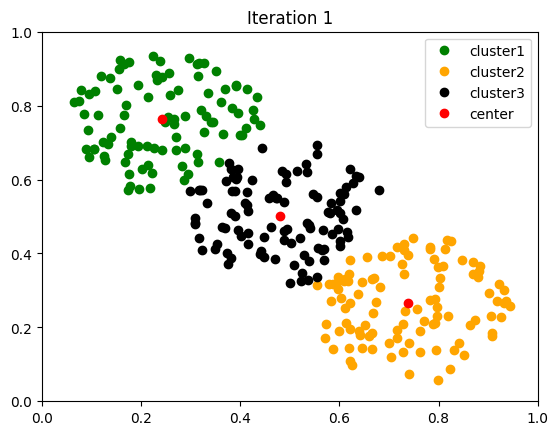

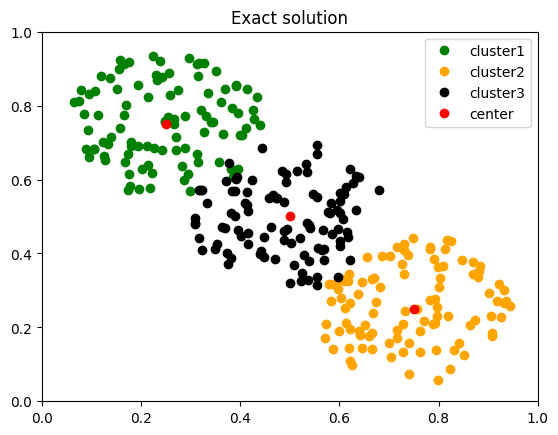

In [34]:
''' K-means implemented with Scikit-learn library
'''
from math import *
import matplotlib.pyplot as pl
from random import random
import numpy as np
from sklearn.cluster import k_means

class point :
    '''This is a small class to hold the coordinates of a point 

   Attributes:
       x: X-coordinate
       y: Y-coordinate
       d: Distance from centroids
'''
    x=0
    y=0

def cdist(p,c):
    ''' cdist computes the distance between two points
    
    Parameters:
        p: Point defined by the point class
        c: Point defined by the point class
        
    Returns: distance between c and p.
    
    The distance d between two points (x_0,y_0) and (x,y) is
    defined by their eukledian distance d = sqrt((x-x0)**2 + (y-y0)**2)
    
    '''
    
    d = sqrt((p.x-c.x)**2 + (p.y-c.y)**2)
    return (d)

def makecluster(center,r,npoints) :
    ''' Makecluster creates a new cluster with random points 
    
        Parameters:
            center  : The centroid point defined by the point class
            r       : Maximum distance between centroid and points in the cluster
            npoints : The number of points in the cluster
            
        Returns:
            a list containing npoint cluster points defined by the point class
            
    '''
    cluster=[]
    n=0
    while (n < npoints):
        
        #Make a new (empty point)
        p=point()
        
        #Set x and y of the point
        p.x = random()
        p.y = random()
        
        #Accept the point if it is closer than r
        if(cdist(p,center) < r):
            p.d=cdist(p,center)
            cluster.append(p)
            n=n+1
            
    return(cluster)

def classify(centroids,cluster):
    ''' Classify will group the points aof a cluster into three new clusters
    
        Parameters: 
            centroids : a list of three points defined by the point class
            cluster   : a list of points defined by the point class
                
        Returns:
            A list of three clusters where a point is grouped into the cluster
            with the shortest distance to the centroid.
            
    '''
                           
    new1=[]
    new2=[]
    new3=[]
    for p in cluster:
        
        c=centroids[0]
        d1=cdist(p,c)
        c=centroids[1]
        d2=cdist(p,c)
        c=centroids[2]
        d3=cdist(p,c)
        
        select = min(d1,d2,d3)
        if(d1 == select): 
            new1.append(p)
        elif(d2 == select):
            new2.append(p)
        elif( d3 == select):
            new3.append(p)
        else:
            print("This should not happen!")
            
    new=[new1,new2,new3]
    return(new)
         
def newcentroid(cluster) :
    ''' Create a centroid for a cluster
    
        Parameters: 
            cluster : List of points defined by the point class
        
        Return:
            A point defined by the point class containg the avearage
            position of all points in the cluster
    
    '''
    
    p0=point()
    p0.x=0
    p0.y=0
    for p in cluster:
        p0.x=p0.x+p.x
        p0.y=p0.y+p.y
        
    ncluster=len(cluster)
    if(ncluster > 0) :
        p0.x=p0.x/ncluster
        p0.y=p0.y/ncluster
        return p0
    else:
        return(None)
    
def plotcluster  (cluster,col,lab):
    ''' Plot a cluster 
    
        Parameters: 
            cluster: A list of points defined by the point class
            col    : String with colorname
            
        Returns: None
        A scatter plot with color given by the string col is generated.
    '''
    xc=[]
    yc=[]
    for p in cluster :
        xc.append(p.x)
        yc.append(p.y)
        
    pl.plot(xc,yc,'o', color=col,label=lab)
    pl.xlim(0,1)
    pl.ylim(0,1)

def plotsolution(centroids,clusters,niter):
    ''' Plotsolution plots all three clusters with different colors
        
        Parameters: 
        centroids : A list of three centroids with points defined by the point class
        clusters  : A list of three clusters wehere each cluster is a list of points
                    defined by the point class
        niter     : Iteration number plotted for reference. If niter is negative the
                    string "Exact" is plotted instead of the iteration number.
    
    '''
    
    plotcluster(clusters[0],'green',  'cluster1')
    plotcluster(clusters[1],'orange', 'cluster2')
    plotcluster(clusters[2],'black',  'cluster3')
    plotcluster(centroids,'red', 'center')
    pl.legend()
    if(niter > 0):
        pl.title("Iteration " + str(niter))
    else:
        pl.title("Exact solution")
    pl.show()

#==================================================================
# Create test data
#==================================================================

# Create a cluster of three points
# to be used as centroids
ncentroids=3
centroids=[]

# Centroid 1
center = point()
center.x = 0.5
center.y = 0.5
centroids.append(center)

# Centroid 2
center = point()
center.x = 0.25
center.y = 0.75
centroids.append(center)

# Centroid 3
center = point()
center.x = 0.75
center.y = 0.25
centroids.append(center)

# Make a copy of the exact centroid
exactcentroids=[]
for p in centroids:
    q=point()
    q.x=p.x
    q.y=p.y
    exactcentroids.append(q)

npoints=100
r=0.2
# Make a cluster at centroid no 1
cluster1= makecluster(centroids[0],r,npoints)
cluster=cluster1

# Make a cluster at centroid no 2
cluster2= makecluster(centroids[1],r,npoints)
cluster=cluster+cluster2

# Make a cluster at centroid no 3
cluster3 = makecluster(centroids[2],r,npoints)
cluster = cluster+cluster3

#===================================================
# K-means with scikit-learn library
#===================================================

#Create numpy array to hold data

# Scikit needs a data array of dimension
# npoints x nfeatures
# Features is in our case x,y coordinates
# so a npoints x 2 array is needed.

nclusters=ncentroids
npoints = len(cluster)
data = np.zeros((npoints,2))
                
for i in range(0,npoints) :
        data[i,0] = cluster[i].x
        data[i,1] = cluster[i].y
        
akmcentroids,kmlabel,kminertia = k_means(data,nclusters)

# kmlabel[i] contains the centroid data point no i
# belongs to.
kmcluster1=[]
kmcluster2=[]
kmcluster3=[]
for i in range(0,npoints):
    if(kmlabel[i] == 0):
        kmcluster1.append(cluster[i])
    elif(kmlabel[i]==1):
        kmcluster2.append(cluster[i])
    elif(kmlabel[i] == 2):
        kmcluster3.append(cluster[i])
    else:
        print("Something is VERY wrong!")

# Make the centroids into point objects
kmcentroids=[]
for i in range(0,nclusters):
    p=point()
    p.x=akmcentroids[i,0]
    p.y=akmcentroids[i,1]
    kmcentroids.append(p)

#===============================================
# Plot solutions
#================================================
#Plot solution
kmsolution = [kmcluster1,kmcluster2,kmcluster3]
plotsolution(kmcentroids,kmsolution,1)

#Plot exact solution
exactcluster = [cluster2,cluster3,cluster1]
plotsolution(exactcentroids,exactcluster,0)
pl.show()


